In [189]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

test = pd.read_csv('C:/Users/qetu7/Downloads/wine-quality-decision-tree/winequality-combined-testing.csv')
train=pd.read_csv('C:/Users/qetu7/Downloads/wine-quality-decision-tree/winequality-combined-training.csv')
y_test=pd.read_csv('C:/Users/qetu7/Downloads/wine-quality-decision-tree/winequality-combined-sample.csv')

In [190]:
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,0
1,1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,0
2,2,8.0,0.16,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,0
3,3,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,0
4,4,7.1,0.14,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,0


In [191]:
test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,1,7.6,0.26,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,2,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,3,7.0,0.24,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,4,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5


In [192]:
train_test_data = [train, test]
for dataset in train_test_data:
     dataset.drop('Id', axis=1, inplace=True)
        
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,0
1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,0
2,8.0,0.16,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,0
3,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,0
4,7.1,0.14,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,0


In [193]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,7.6,0.26,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,7.0,0.24,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5


In [194]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,7.6,0.26,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,7.0,0.24,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5


In [195]:
train['type'].value_counts()

0    3898
1    1199
Name: type, dtype: int64

0과 1밖에 없음
type: 품종에 따라 white wine = 0, red wine = 1의 값을 가짐.

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

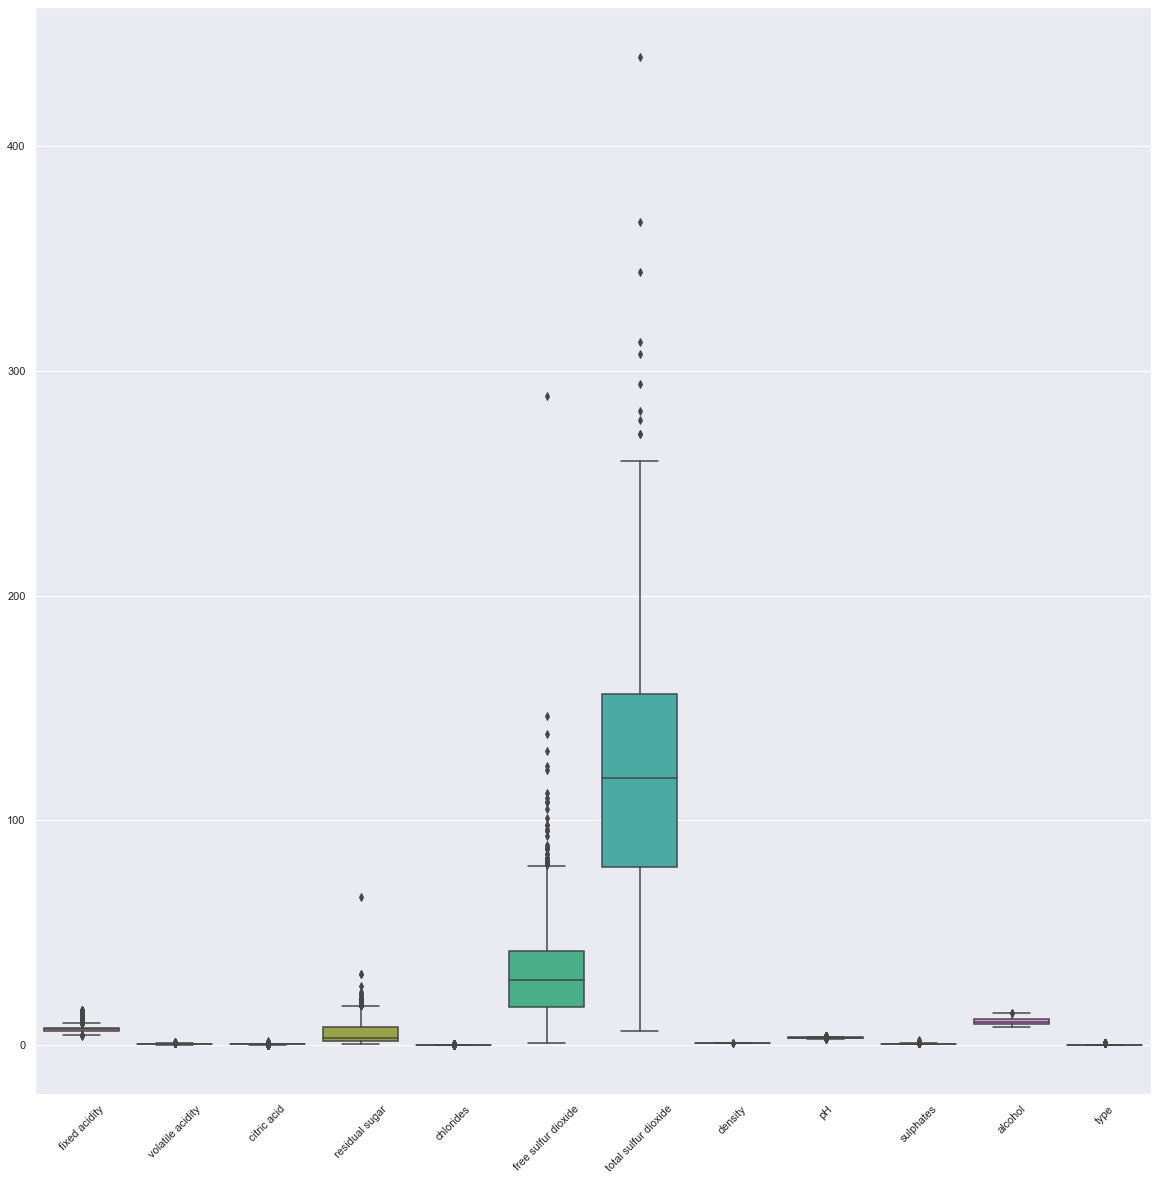

In [197]:
plt.figure(figsize=(20,20)) #크기 조절

plt.xticks(rotation=45) #font 기울기

sns.boxplot(data = train)

plt.show()

작은(max<10)값들을 직관적으로 해석하기 위해 다시 한번 시각화
(+ 내 생각 : 엄청 벗어난 값을 처리해줘야할 것 같음)

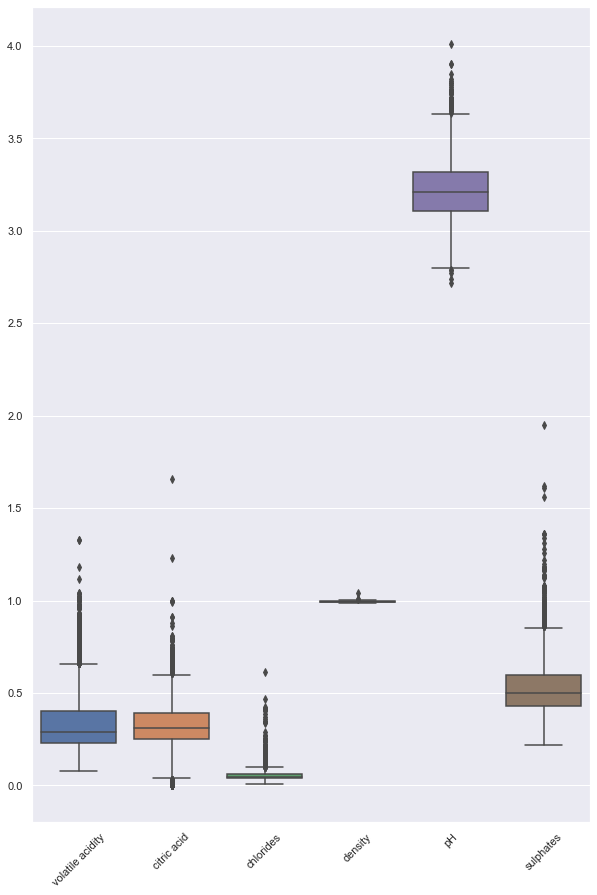

In [198]:
plt.figure(figsize=(10,15)) #크기 조절
plt.xticks(rotation=45) #font 기울기
sns.set(font_scale = 1)

sns.boxplot(data = train[['volatile acidity', 'citric acid', 'chlorides', 
                          'density', 'pH', 'sulphates']])
plt.show()

# decision tree 데이터 만들기

x_traiin은 type을 뺀 속성, y_train은 결과값 즉, type을 의미함

In [199]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x_train = train.drop(['type'], axis=1, inplace = False)
y_train = train['type']

print("Train Set Score1 : {:.2f}".format(dTreeAll.score(x_train, y_train)))


Train Set Score1 : 1.00


In [200]:
x_test =test.values

In [201]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.180,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,7.6,0.260,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,7.0,0.270,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,7.0,0.240,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,11.1,0.390,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5
...,...,...,...,...,...,...,...,...,...,...,...
1395,6.8,0.320,0.37,3.4,0.023,19.0,87.0,0.99020,3.14,0.53,12.7
1396,5.6,0.235,0.29,1.2,0.047,33.0,127.0,0.99100,3.34,0.50,11.0
1397,6.7,0.270,0.31,15.7,0.036,44.0,179.0,0.99790,3.26,0.56,9.6
1398,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6


In [202]:
x_test

array([[ 7.4 ,  0.18,  0.36, ...,  3.42,  0.35,  9.1 ],
       [ 7.6 ,  0.26,  0.36, ...,  3.15,  0.4 , 10.4 ],
       [ 7.  ,  0.27,  0.48, ...,  3.2 ,  0.5 ,  9.4 ],
       ...,
       [ 6.7 ,  0.27,  0.31, ...,  3.26,  0.56,  9.6 ],
       [ 6.7 ,  0.46,  0.24, ...,  3.39,  0.6 , 10.6 ],
       [ 6.7 ,  0.56,  0.09, ...,  3.46,  0.61, 10.2 ]])

x_test는 test값에서 values만 빼와서 배열로 저장한 것.

In [203]:
dTreeAll.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [204]:
feature_names = train.columns
feature_names = np.delete(feature_names, -1) #delete 'type' feature

In [205]:
dT1=export_graphviz(dTreeAll, out_file='winedT1.dot', class_names=["White","Red"],
                feature_names=feature_names, impurity=False, filled=True)

# 기본 decisioin Tree 생성 및 시각화

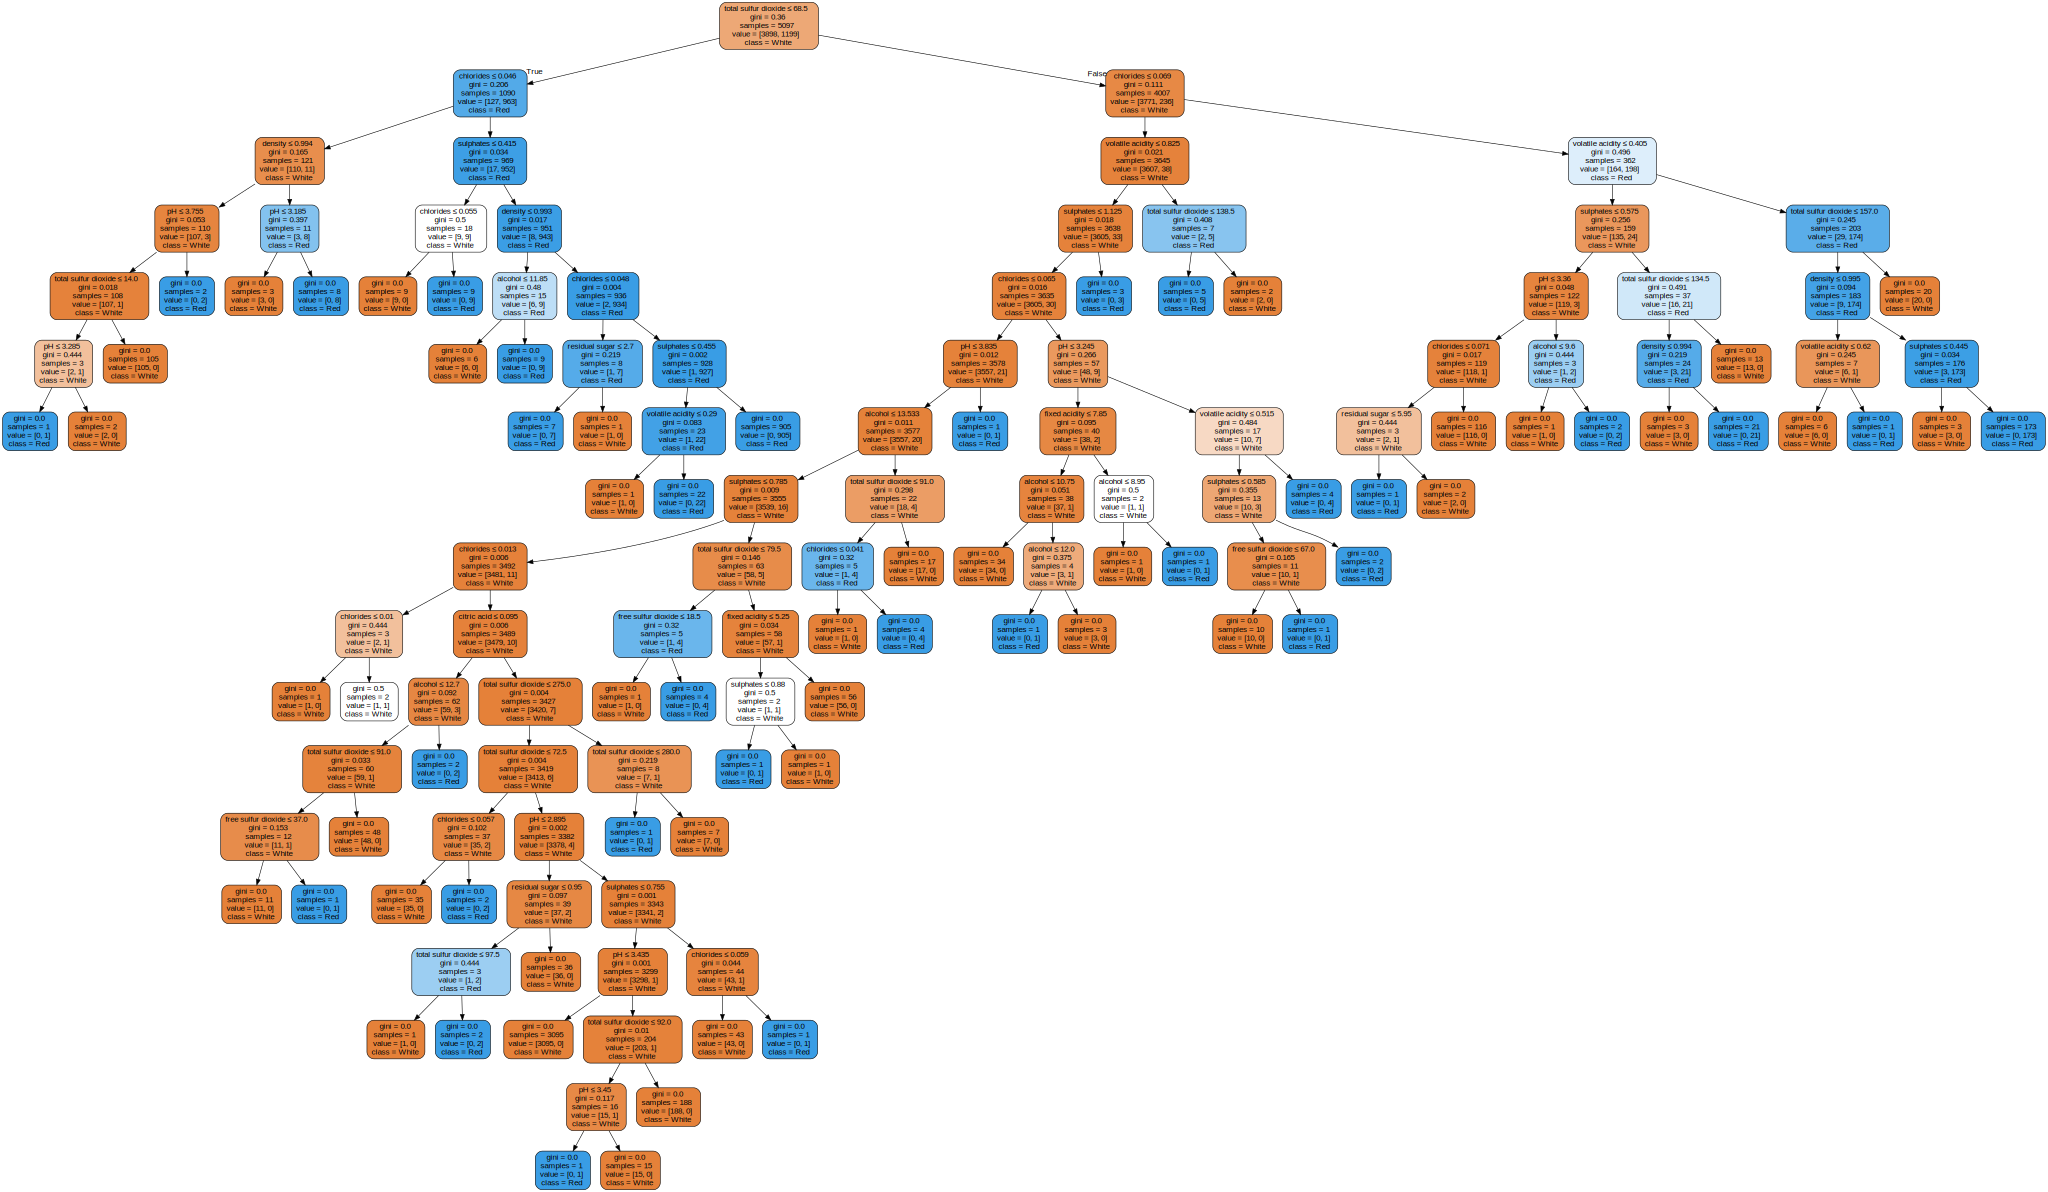

In [206]:
import graphviz

# decision tree생성(선언). 이름은 dTreeAll임
dTreeAll = DecisionTreeClassifier(random_state=0) # 각 분기시 분기 순서 재배치

dTreeAll.fit(x_train, y_train)
graph_dT1 = export_graphviz(dTreeAll, out_file = None,
                                feature_names = feature_names,
                               class_names = ['White', 'Red'],
                               filled = True, rounded = True,
                               special_characters = True) #특수문자

graph1 = graphviz.Source(graph_dT1)

graph1

In [207]:
(graph1,) = pydot.graph_from_dot_file('winedT1.dot', encoding='utf8')
graph1.write_png('winedT1.png') # graph를 winedT라는 png파일로 저장
#graph1.render(filename='winedT1.png')

# 깊이제한 decision Tree

In [208]:

#의사결정 트리 선언(트리 깊이 제한)
dTreeLimit = DecisionTreeClassifier(max_depth=3, random_state=0)


#훈련 (가지치기 : 리프노드 깊이 제한)
dTreeLimit.fit(x_train, y_train)


dT2=export_graphviz(dTreeLimit, out_file='winedT2.dot', class_names=["White","Red"],
                feature_names=feature_names, impurity=False, filled=True)



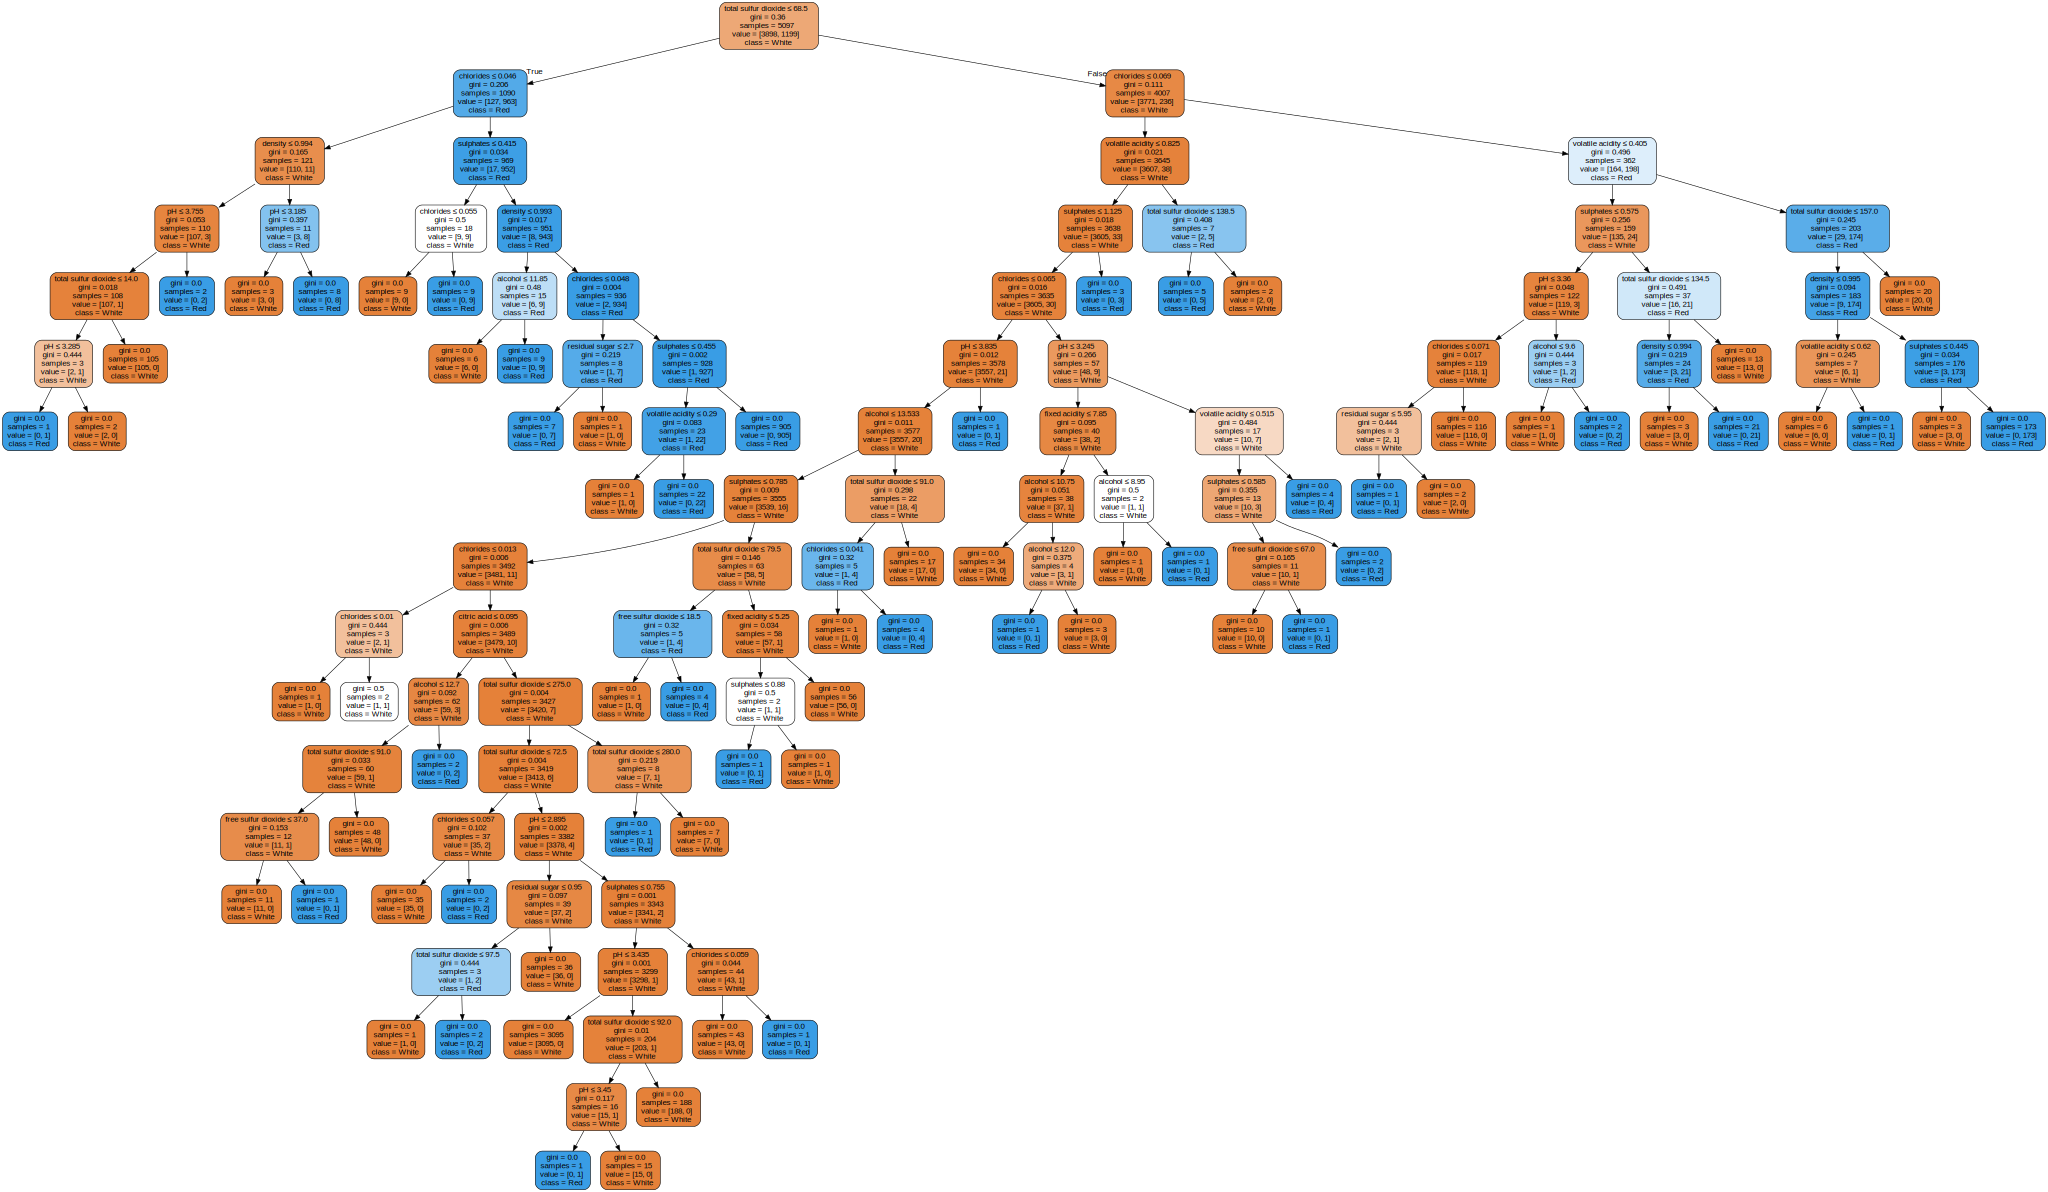

In [209]:
graph_dT2 = export_graphviz(dTreeAll, out_file = None,feature_names = feature_names,class_names = ['White', 'Red'], 
                            filled = True, rounded = True,special_characters = True) #특수문자

graph2 = graphviz.Source(graph_dT2)
graph2


In [210]:
(graph2,) = pydot.graph_from_dot_file('winedT2.dot', encoding='utf8')
graph2.write_png('winedT2.png') # graph를 winedT라는 png파일로 저장

# 엔트로피를 고려한 decision Tree

In [211]:
dTreeEntropy=DecisionTreeClassifier(criterion = 'entropy')
dTreeEntropy.fit(x_train, y_train)

dT3=export_graphviz(dTreeEntropy, out_file='winedT3.dot', class_names=["White","Red"],
                feature_names=feature_names, impurity=False, filled=True)

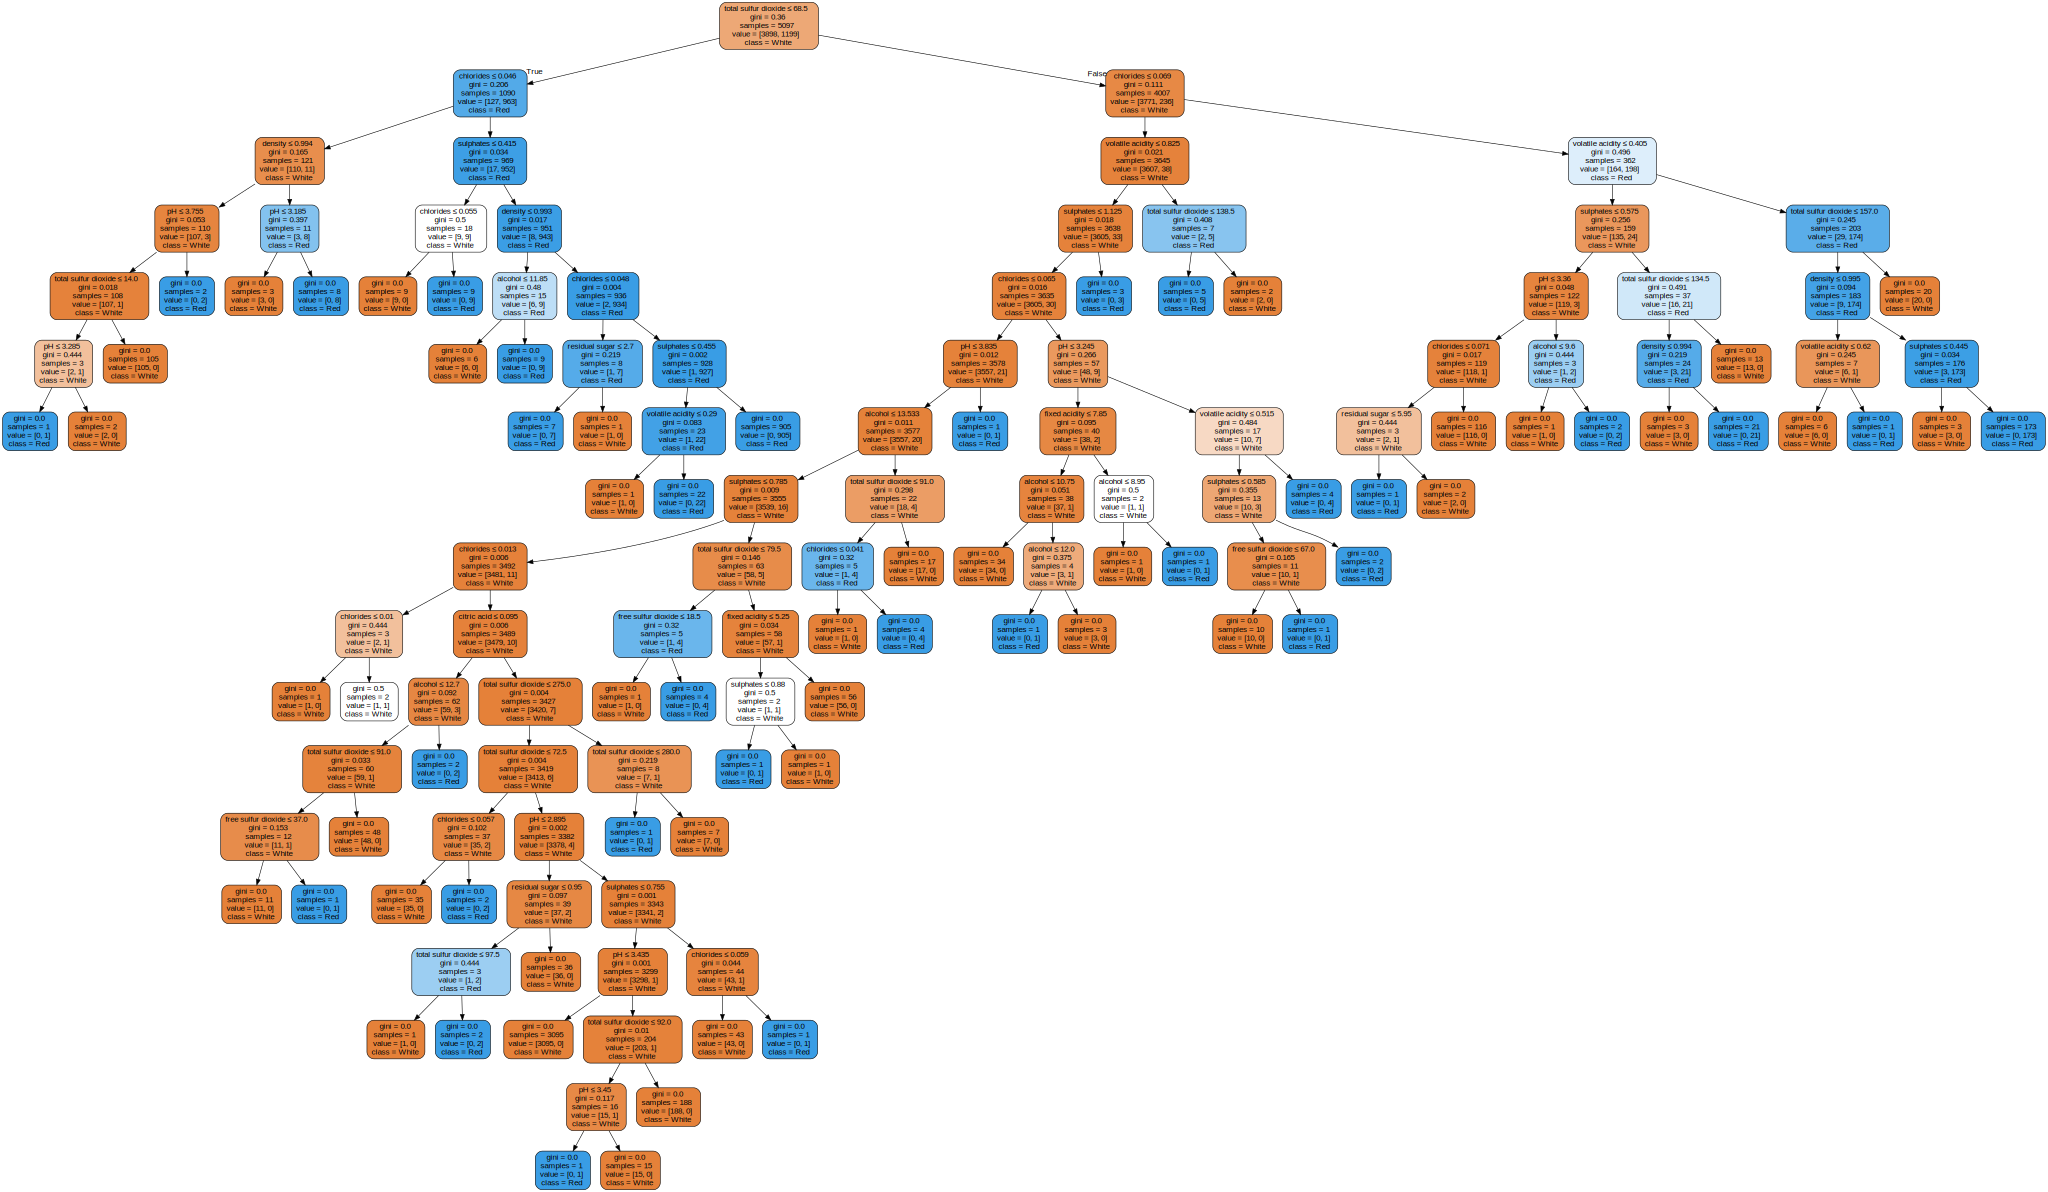

In [212]:
graph_dT3 = export_graphviz(dTreeAll, out_file = None,feature_names = feature_names,class_names = ['White', 'Red'], 
                            filled = True, rounded = True,special_characters = True) #특수문자

graph3 = graphviz.Source(graph_dT3)
graph3

In [213]:
(graph3,) = pydot.graph_from_dot_file('winedT3.dot', encoding='utf8')
graph3.write_png('winedT3.png') # graph3를 winedT3라는 png파일로 저장

# 정밀도, 재현율, F1점수로 전체적인 모델 성능 평가
macro avg 단순 평균   
weighted avg 가중 평균

In [214]:
y_test.drop('Id', axis = 1, inplace = True)

In [215]:
from sklearn.metrics import classification_report

print(classification_report(dTreeAll.predict(x_test), y_test, target_names=['White', 'Red']))

              precision    recall  f1-score   support

       White       0.73      1.00      0.84      1017
         Red       0.00      0.00      0.00       383

    accuracy                           0.73      1400
   macro avg       0.36      0.50      0.42      1400
weighted avg       0.53      0.73      0.61      1400



C:\Users\qetu7\anaconda3\envs\SVE2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
print(classification_report(dTreeLimit.predict(x_test), y_test, target_names=['White', 'Red']))

              precision    recall  f1-score   support

       White       0.72      1.00      0.84      1012
         Red       0.00      0.00      0.00       388

    accuracy                           0.72      1400
   macro avg       0.36      0.50      0.42      1400
weighted avg       0.52      0.72      0.61      1400



C:\Users\qetu7\anaconda3\envs\SVE2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [217]:
print(classification_report(dTreeEntropy.predict(x_test), y_test, target_names=['White', 'Red']))

              precision    recall  f1-score   support

       White       0.72      1.00      0.84      1013
         Red       0.00      0.00      0.00       387

    accuracy                           0.72      1400
   macro avg       0.36      0.50      0.42      1400
weighted avg       0.52      0.72      0.61      1400



C:\Users\qetu7\anaconda3\envs\SVE2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
